#####  Objective

Goal is to build simple linear regression models to estimate the `median_house_value` using three different predictor variables independently:
- `median_income`
- `population`
- `households`

By comparing the performance of these models, we aim to determine which variable most effectively captures the pattern in housing values. The results will help guide decisions about feature selection for future multivariate models.


In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

##### Getting/Downloading the dataset

In [18]:



path = "Data/housing.csv"
housing_df = pd.read_csv(path)
housing_df.head()


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


##### Dataset Source: https://www.kaggle.com/datasets/camnugent/california-housing-prices

##### Exploratory Data Analysis (EDA)


In [19]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


##### Scatter Plots

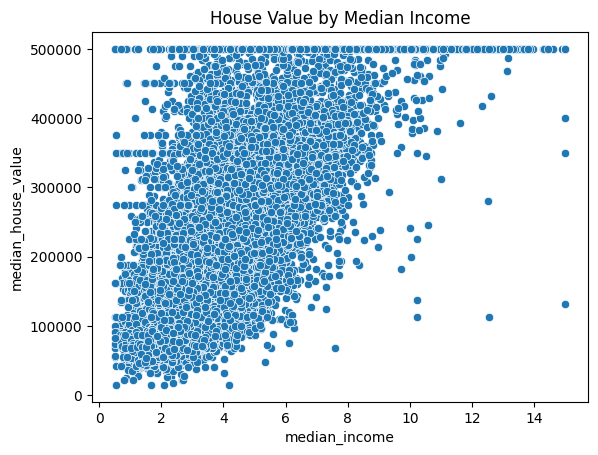

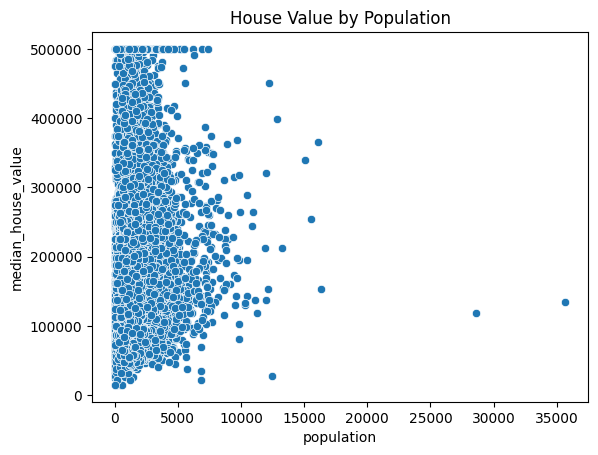

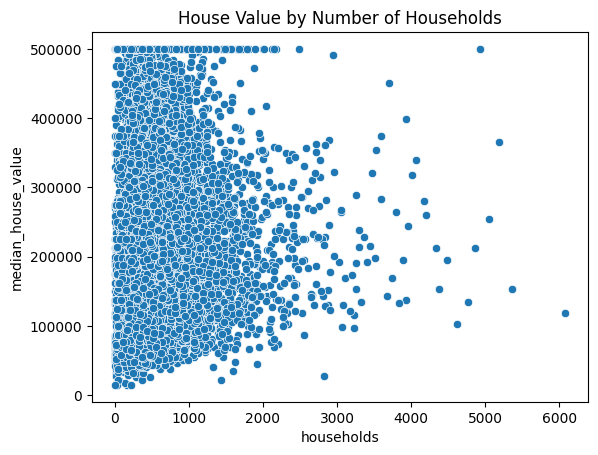

In [20]:
# Income vs Value
sns.scatterplot(data=housing_df, x="median_income", y="median_house_value").set_title("House Value by Median Income")
plt.show()

# Population vs Value
sns.scatterplot(data=housing_df, x="population", y="median_house_value").set_title("House Value by Population")
plt.show()

# Households vs Value
sns.scatterplot(data=housing_df, x="households", y="median_house_value").set_title("House Value by Number of Households")
plt.show()

### Key Observations

- **Median Income** is visibly correlated with housing value; as income rises, house prices tend to increase.
- **Population** shows scattered, less structured distribution with weak visible trends.
- **Households** displays a somewhat linear trend, but weaker than income.

#### Variable Notes:
- `median_income`: Median income of district residents (range: ~0 to ~15).
- `population`: Total people in the district.
- `households`: Count of residential units.
- `median_house_value`: Target variable, representing housing value.


## Modeling – Linear Regression for house data

In [21]:
def evaluate_single_feature(input_col, target_col):
    """Trains a linear model on a single predictor and returns evaluation metrics."""
    regressor = LinearRegression()
    regressor.fit(input_col, target_col)
    predicted = regressor.predict(input_col)
    
    error_mse = mean_squared_error(target_col, predicted)
    error_mae = mean_absolute_error(target_col, predicted)
    
    return regressor.intercept_, regressor.coef_[0], error_mse, error_mae, predicted

In [22]:
features_to_test = ["median_income", "population", "households"]
results_summary = []

for column in features_to_test:
    X = housing_df[[column]]
    y = housing_df["median_house_value"]
    
    intercept, slope, mse, mae, predictions = evaluate_single_feature(X, y)
    results_summary.append((column, intercept, slope, mse, mae))

summary_df = pd.DataFrame(results_summary, columns=["Feature", "Intercept", "Slope", "MSE", "MAE"])
summary_df


,Feature,Intercept,Slope,MSE,MAE
0,median_income,45085.576703,41793.849202,7.011312e+09,62625.933791
1,population,210436.262076,-2.511753,1.330741e+10,91153.820095
2,households,196928.577162,19.872775,1.325778e+10,90802.743243


In [23]:
def plot_regression_results(x_vals, y_vals, intercept, slope, label_title, mse_val, mae_val):
    """Displays regression line and error metrics on top of scatter plot."""
    plt.figure(figsize=(8, 5))
    plt.scatter(x_vals, y_vals, alpha=0.3, label="Actual Values")
    plt.plot(x_vals, intercept + slope * x_vals, color="blue", label="Prediction Line")
    
    plt.title(label_title)
    plt.xlabel(x_vals.name)
    plt.ylabel("Median House Value")
    
    text_label = f"y = {intercept:.2f} + {slope:.2f}x\nMSE: {mse_val:.0f}\nMAE: {mae_val:.0f}"
    plt.text(x_vals.min(), y_vals.max()*0.9, text_label, fontsize=10, bbox=dict(facecolor="white", alpha=0.5))
    plt.legend()
    plt.grid(True)
    plt.show()


In [ ]:
# Loop through and plot
for feature, intercept, slope, mse, mae in results_summary:
    plot_regression_results(housing_df[feature], housing_df["median_house_value"],
                            intercept, slope,
                            f"Linear Fit: {feature} vs House Value",
                            mse, mae)
